# **<center><div class="alert-danger"> EDA and House Price Prediction </div></center>**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


*Provided House dataset is divided into two csv files as train and test. We will use train.csv for exploratory data analysis and to fit appropriate model, the latter is used for prediction using selected trained model.*

## **<div class="alert-warning"> Working on Train Dataset </div>**

*********************
### **Obtaining Data and related Information**
***********************

In [478]:
data=pd.read_csv("Salesprice(train).csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [479]:
data.shape

(1460, 81)

In [480]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [481]:
null=data.isnull().sum().sort_values(ascending=False)
null.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

*****************************
### **Data Preprocessing**
****************************

*According to the data description NA or nan signifies that the particular attribute is not present in the house,
like No Basement, No Garage, No Pool etc. Those columns which are having more than 75% of attributes absent can be ignored.
and numerical columns with few nan values can be replaced by their mean.*


In [482]:
li=null.head(5).index
li

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')

In [483]:
data=data.drop(li, axis=1)
data.shape

(1460, 76)

In [484]:
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)

In [485]:
for i in data.columns:
    if isinstance(data[i][0], str):
        data[i]=data[i].fillna('Not Present')

In [486]:
data=data.fillna(data.mean())
data.isnull().sum().sort_values(ascending=False).head(20)

SalePrice        0
ExterCond        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
SaleCondition    0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
YearRemodAdd     0
YearBuilt        0
dtype: int64

In [487]:
data.shape

(1460, 76)

In [488]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

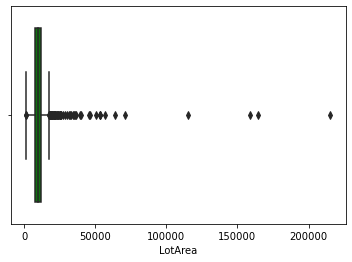

In [489]:
sns.boxplot(data['LotArea'], color='green');

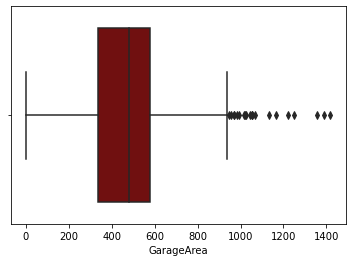

In [490]:
sns.boxplot(data['GarageArea'], color='maroon');

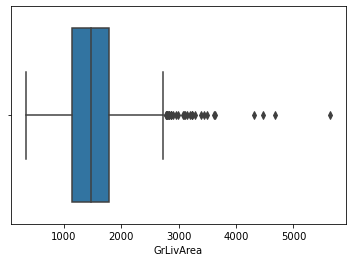

In [491]:
sns.boxplot(data['GrLivArea']);

__

*5 columns were having most of the values as nan, which are dropped from the dataset.*
*numeric columns having nan values are replaced by its mean.* 
*string columns having null values are replaced with 'Not Present*

*Since most columns values are interrelated to SalePrice directly,say SalePrice is set according to house's area and 
the Price prediction evaluation in Industries is now based on mean squared log error (MSLE) which scales down the outliers if any hence nullyfying its effect unlike in the case of RSME, so keeping outliers unaffected in this dataset.*

*No duplicate columns found in dataset.*

__

**************
### **Data Visualization**
***********

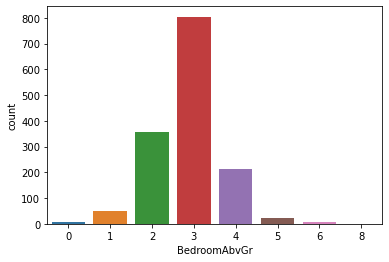

In [492]:
sns.countplot(data['BedroomAbvGr']);

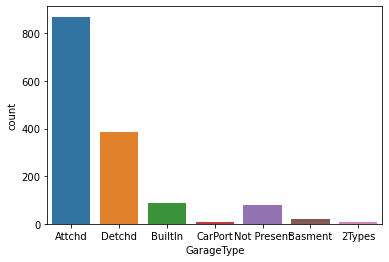

In [493]:
sns.countplot(data['GarageType']);

In [494]:
data.pivot_table(index=['BedroomAbvGr'], columns=['GarageType'], aggfunc={'SalePrice':sum})

SalePrice                                                \
GarageType      2Types       Attchd    Basment     BuiltIn   CarPort   
BedroomAbvGr                                                           
0                  NaN    1076000.0        NaN         NaN  108959.0   
1                  NaN    7272810.0        NaN    316600.0       NaN   
2                  NaN   35900310.0   868743.0    593500.0  548700.0   
3             504700.0  106038248.0   955500.0   9383572.0  332000.0   
4             232000.0   24713843.0  1029600.0  11882481.0       NaN   
5             171000.0    1515400.0   197000.0    242000.0       NaN   
6                  NaN          NaN        NaN         NaN       NaN   
8                  NaN          NaN        NaN         NaN       NaN   

                                      
GarageType        Detchd Not Present  
BedroomAbvGr                          
0               144000.0         NaN  
1               472211.0    596500.0  
2             16714809.0   2008700.0  
3             25163404.0   3192300.0  
4              7342503.0   1749300.0  
5              1326800.0    345000.0  
6               729553.0    276900.0  
8                    NaN    200000.0

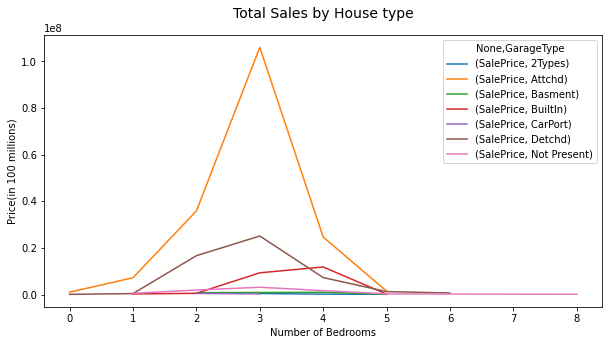

In [495]:
data.pivot_table(index=['BedroomAbvGr'], columns=['GarageType'], 
                 aggfunc={'SalePrice':'sum'}).plot(figsize=(10,5))
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price(in 100 millions)')
plt.title("Total Sales by House type", y=1.04, fontsize='14');

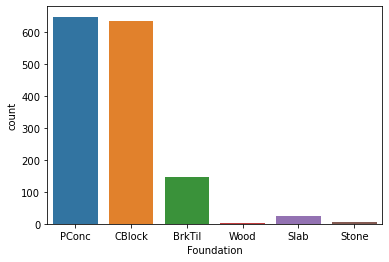

In [496]:
sns.countplot(data['Foundation']);

In [497]:
data.groupby('Foundation')[['SalePrice']].count().reset_index()

,Foundation,SalePrice
0,BrkTil,146
1,CBlock,634
2,PConc,647
3,Slab,24
4,Stone,6
5,Wood,3


__

Above data shows house having 3 or 2 bedrooms with attached garage is most prefered by people followed by 3 bedrooms with garage detached from home.

Almost every house has either Poured Concrete or Cinder Block foundation.

__

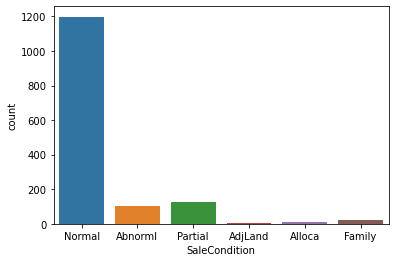

In [498]:
sns.countplot(data['SaleCondition']);

In [499]:
units=data.groupby('YrSold')[['SalePrice']].count().reset_index()
units.rename(columns={'YrSold':'Year_Sold','SalePrice':'House_Units'}, inplace=True)
units

,Year_Sold,House_Units
0,2006,314
1,2007,329
2,2008,304
3,2009,338
4,2010,175


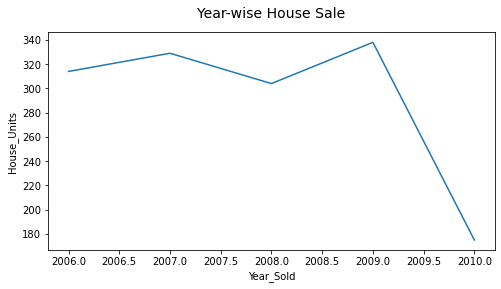

In [500]:
plt.figure(figsize=(8,4))
sns.lineplot(x=units['Year_Sold'], y=units['House_Units'])
plt.title("Year-wise House Sale", y=1.04, fontsize='14');

In [501]:
year=data[data['YrSold']==2010][['BedroomAbvGr','GarageType']].value_counts().reset_index()
year.rename(columns={0:'Units'}, inplace=True)
year

,BedroomAbvGr,GarageType,Units
0,3,Attchd,70
1,2,Attchd,23
2,3,Detchd,21
3,4,Attchd,10
4,2,Detchd,10
5,4,Detchd,6
6,4,BuiltIn,6
7,3,Not Present,5
8,1,Attchd,4
9,4,Not Present,3


__

*We have data of household sales from year 2006-2010, and it can be seen that there is a drastic fall in Household sales, this could be the after effect which can be seen in real estate sector because of 2008-09 recession.
However with minimal selling 3 or 2 bedrooms units with attached garage sold the most.*

__

Moving towards some quality checks i.e. kitchen and basement quality

In [502]:
kitchen=data.groupby('KitchenQual')['Id'].count()
kitchen

KitchenQual
Ex    100
Fa     39
Gd    586
TA    735
Name: Id, dtype: int64

In [503]:
base=data.groupby('BsmtQual')['Id'].count()
base

BsmtQual
Ex             121
Fa              35
Gd             618
Not Present     37
TA             649
Name: Id, dtype: int64

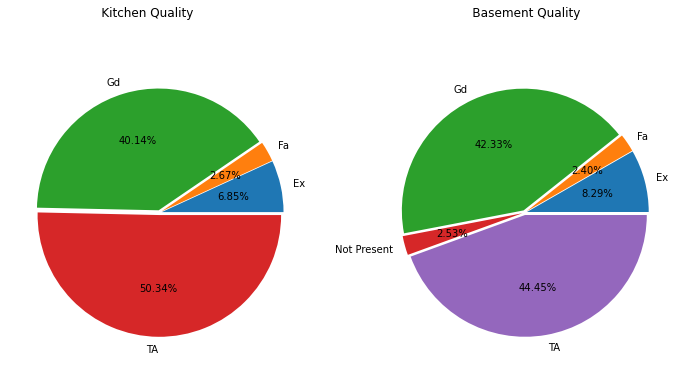

In [504]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
axs[0].pie(kitchen, labels=kitchen.index, autopct='%.2f%%', explode=[0.02]*4)
axs[1].pie(base, labels=base.index, autopct='%.2f%%', explode=[0.02]*5)
fig.suptitle("     Kitchen Quality                                  "     
             "                                      Basement Quality");

__

- Ex :	Excellent
- Gd :	Good
- TA :	Typical/Average
- Fa :	Fair
- Po :	Poor

Almost 90% of the houses are having either Good or Average Qulaity basement and kitchen.

__

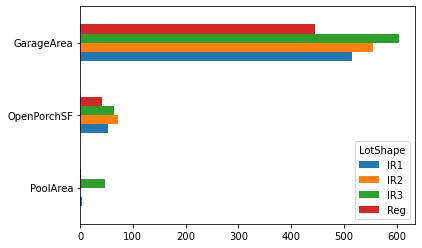

In [505]:
data.groupby('LotShape')[['PoolArea','OpenPorchSF','GarageArea']].mean().T.plot(kind='barh');

__

LotShape: General shape of property
      
- Reg: Regular
- IR1: Slightly irregular    
- IR2: Moderately Irregular     
- IR3: Irregular
  
  
It can be seen that all four types of lotshape are almost equally distributed to the houses having Garage and OpenPorch area, but property with Pool area are all irregular in shape.

__

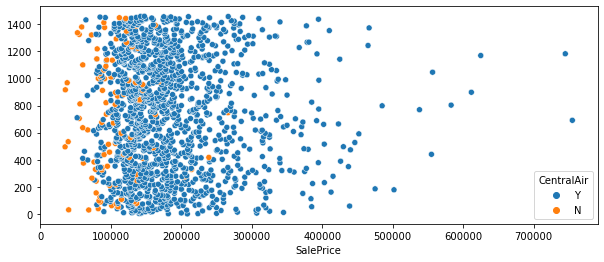

In [506]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=data['SalePrice'], y=data.index, hue='CentralAir', data=data);

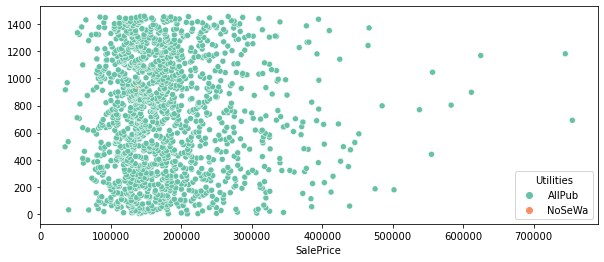

In [507]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=data['SalePrice'], y=data.index, hue='Utilities', data=data, palette='Set2');

__

Utilities:
* AllPub	All public Utilities (E,G,W,& S)	     
* NoSewr	Electricity, Gas, and Water (Septic Tank)      
* NoSeWa	Electricity and Gas Only      
* ELO	Electricity only

*Nearly every household is equiped with all public utilities Electricity, Gas, and Water(Septic Tank) and only few low budget(<150,000) household are not having Central Air Conditioning. This signifies demand in good quality medium sized households with all given benefits and huge money inflow in this sector year on year basis (keeping 2010 aside).*

__

In [508]:
lis=[]
for i in data.columns:
    if isinstance(data[i][0], str):
        lis.append(i)

In [509]:
num_data=data.drop(lis, axis=1)
num_data.shape

(1460, 38)

In [510]:
d=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
 'TotRmsAbvGrd','Fireplaces','OverallQual','OverallCond','MoSold','GarageCars']

In [511]:
fin_data=num_data.drop(d, axis=1)
fin_data.shape

(1460, 26)

In [512]:
fin_data.corr()[fin_data.corr()>0.4]

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSSubClass,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,1.000000,0.592855,NaN,NaN,NaN,NaN,...,0.478954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.522897
YearRemodAdd,NaN,NaN,NaN,NaN,0.592855,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.507101
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.475241
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtUnfSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [513]:
list(fin_data.isnull())

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

In [514]:
p=['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1''TotalBsmtSF',
   '1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF']

c=['Id','MSSubClass','BsmtFinSF2','BsmtUnfSF', 'LowQualFinSF','EnclosedPorch',
   '3SsnPorch','ScreenPorch','PoolArea','YrSold','MiscVal', 'LotFrontage', 'LotArea',
   'MasVnrArea', 'WoodDeckSF','OpenPorchSF']

In [515]:
filtered_data=fin_data.drop(c, axis=1)
filtered_data.shape

(1460, 10)

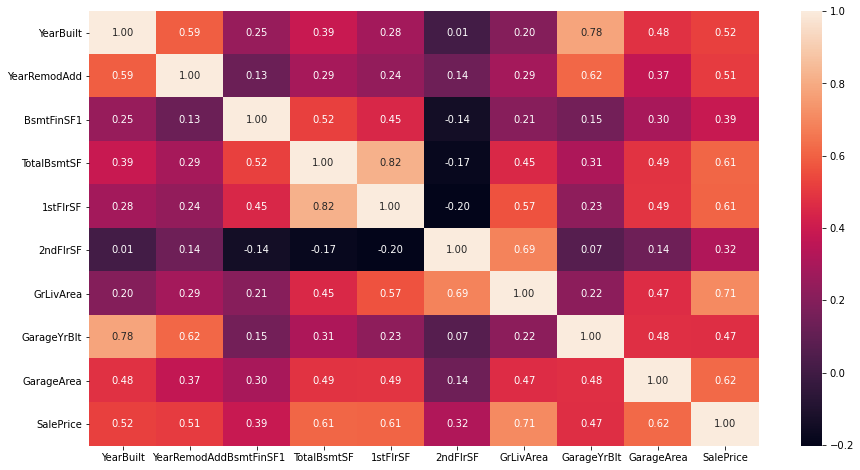

In [516]:
plt.figure(figsize=(15,8))
sns.heatmap(filtered_data.corr(), annot=True, fmt='.2f');

__

YearBuilt, YearRemodAdd, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageYrBlt, GarageArea 
are some attributes that are correlated quite well with SalePrice and are the deciding factor for property rates.

__

## **<div class="alert-warning"> Working on Test Dataset </div>**

In [519]:
test=pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [520]:
test.shape

(1459, 80)

In [521]:
test.isnull().sum().sort_values(ascending=False).head(34)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
dtype: int64

In [522]:
test=test.drop(li, axis=1)

In [523]:
for i in test.columns:
    if isinstance(test[i][0], str):
        test[i]=test[i].fillna('Not Present')

In [524]:
test=test.fillna(test.mean())
test.isnull().sum().sort_values(ascending=False).head(12)

SaleCondition    0
YearBuilt        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
dtype: int64

In [525]:
test.shape

(1459, 75)

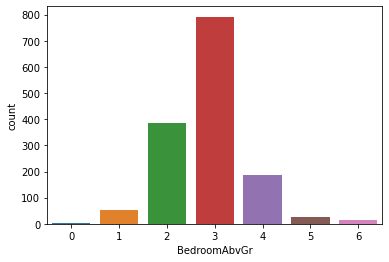

In [526]:
sns.countplot(test['BedroomAbvGr']);

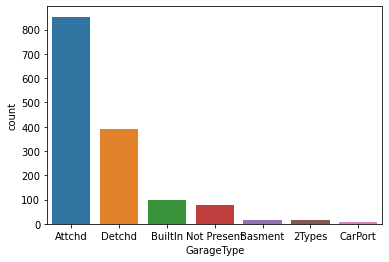

In [527]:
sns.countplot(test['GarageType']);

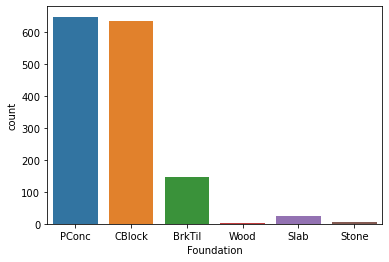

In [528]:
sns.countplot(data['Foundation']);

## **<div class="alert-info"> Model Testing on Validation set and Metric Check </div>**

In [529]:
train_df=data.copy()
test_df=test.copy()

In [530]:
#adding SalePrice column in test set and marking both train and test set to prepare for concatination

train_df['mark']=1
test_df['SalePrice']=5
test_df['mark']=0
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,mark
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,120,0,0,6,2010,WD,Normal,5,0
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,12500,6,2010,WD,Normal,5,0
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,3,2010,WD,Normal,5,0
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,6,2010,WD,Normal,5,0
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,144,0,0,1,2010,WD,Normal,5,0


In [531]:
# concatinating

con=pd.concat((train_df,test_df))
con

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,mark
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,6,2006,WD,Normal,5,0
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2006,WD,Abnorml,5,0
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,9,2006,WD,Abnorml,5,0
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,700,7,2006,WD,Normal,5,0


In [532]:
#dropping ID column

con.drop(['Id'], axis=1, inplace=True)

In [533]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

for i in lis:
    con[i]=label.fit_transform(con[i])
con

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,mark
0,60,4,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,2,2008,9,4,208500,1
1,20,4,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,5,2007,9,4,181500,1
2,60,4,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,9,2008,9,4,223500,1
3,70,4,60.0,9550,1,0,3,0,0,0,...,0,0,0,0,2,2006,9,0,140000,1
4,60,4,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,12,2008,9,4,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,5,21.0,1936,1,3,3,0,4,0,...,0,0,0,0,6,2006,9,4,5,0
1455,160,5,21.0,1894,1,3,3,0,4,0,...,0,0,0,0,4,2006,9,0,5,0
1456,20,4,160.0,20000,1,3,3,0,4,0,...,0,0,0,0,9,2006,9,0,5,0
1457,85,4,62.0,10441,1,3,3,0,4,0,...,0,0,0,700,7,2006,9,4,5,0


In [534]:
#splitting train-test set for #Order pridiction

train_label=con[con['mark']==1]
test_label=con[con['mark']==0]

In [535]:
train_label.drop(['mark'], axis=1, inplace=True)
test_label.drop(['mark'], axis=1, inplace=True)
test_label.drop(['SalePrice'], axis=1, inplace=True)
test_label.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,3,80.0,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,9,4
1,20,4,81.0,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,9,4
2,60,4,74.0,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,9,4
3,60,4,78.0,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,9,4
4,120,4,43.0,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,9,4


In [536]:
#splitting feature and target variable

x=train_label.drop(['SalePrice'], axis=1)
y=train_label['SalePrice']

In [537]:
#applying algorithm for prediction

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state=10) 

In [538]:
# Chechng with different models

#### RF

In [266]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators = 100)
forest.fit(x_train, y_train)

RandomForestRegressor()

In [267]:
y_predf=forest.predict(x_test)

In [214]:
# importing metrics

from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error

In [377]:
print("R-Square score: ",r2_score(y_test, y_predf),"\n"
"RMSE: ",mean_squared_error(y_test, y_predf)**0.5,"\n"
"MSLE: ",mean_squared_log_error(y_test, y_predf)*100)

R-Square score:  0.8797682927304042 
RMSE:  27733.002757687453 
MSLE:  2.204760707777888


#### GB

In [375]:
from sklearn.ensemble import GradientBoostingRegressor
boost=GradientBoostingRegressor(learning_rate = 0.03, n_estimators=700)
boost.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.03, n_estimators=700)

In [373]:
y_predg=boost.predict(x_test)

In [378]:
print("R-Square score: ",r2_score(y_test, y_predg),"\n"
"RMSE: ",mean_squared_error(y_test, y_predg)**0.5,"\n"
"MSLE: ",mean_squared_log_error(y_test, y_predg)*100)

R-Square score:  0.8972534310169424 
RMSE:  25637.227190246555 
MSLE:  1.7476995270088491


#### XGB

In [431]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate = 0.02, n_estimators = 600, max_depth=7, min_child_weight=2)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=7,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [432]:
y_predx=xgb.predict(x_test)

In [433]:
print("R-Square score: ",r2_score(y_test, y_predx),"\n"
"RMSE: ",mean_squared_error(y_test, y_predx)**0.5,"\n"
"MSLE: ",mean_squared_log_error(y_test, y_predx)*100)

R-Square score:  0.9033073718812241 
RMSE:  24870.474437582903 
MSLE:  1.6314774548708042


In [439]:
actual=y_test.reset_index()
actual=actual['SalePrice']
actual

0      170000
1      187750
2      137000
3      164500
4      309000
        ...  
287    135000
288    217500
289    335000
290    160000
291    125000
Name: SalePrice, Length: 292, dtype: int64

* XGBRegressor comes out to be better than others, so chosing this for prediction

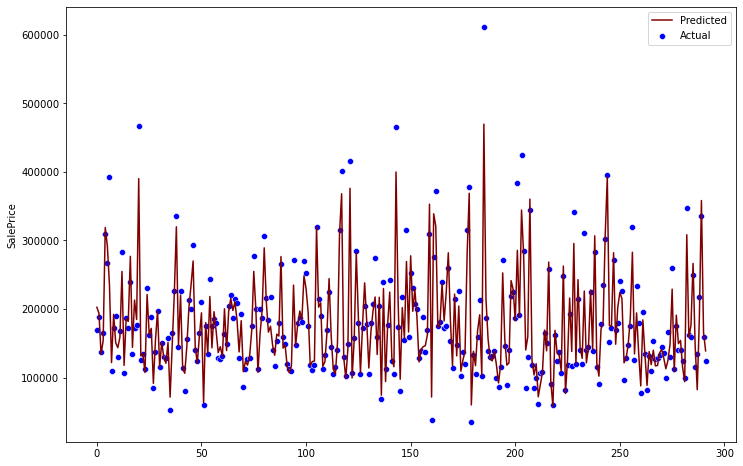

In [442]:
plt.figure(figsize=(12,8))
sns.scatterplot(actual.index, actual, label='Actual', color='blue')
plt.plot(actual.index, y_predx, label='Predicted', color='maroon')
plt.legend(loc=1);

## **<div class="alert-success"> SalePrice Prediction </div>**

In [449]:
test_pred=xgb.predict(test_label)

In [450]:
test_df['SalePrice']=test_pred

In [452]:
sub=test_df.iloc[:,[0,-2]]
sub

,Id,SalePrice
0,1461,119146.882812
1,1462,159999.328125
2,1463,178458.718750
3,1464,193595.546875
4,1465,196810.750000
...,...,...
1454,2915,81919.476562
1455,2916,80620.007812
1456,2917,155543.578125
1457,2918,117810.007812


In [459]:
sub.to_csv('House_price_prediction.csv', header=True, index=False)

***************************************